In [1]:
import glob
import DataViz as dv
from random import shuffle
import matplotlib
import matplotlib.image as mpimg
import imageio as im
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import keras
from keras.datasets import cifar10
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
import LoadDataset as LD
import numpy as np
import scipy.misc
from scipy.misc import imresize
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Hyperparameters
batch_size = 100
num_classes = 10
epochs = 1

In [5]:

load_data = LD.LoadData('/Users/mdabdulkadir/WS1819/ADAI/data') # give the directory address.
X_dat ,Y_dat = load_data.generate_data_2cls(['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9'])

X_dat ,Y_dat = load_data.shuffle_data(X_dat,Y_dat)

Dataset directory added
['.DS_Store', 'c7', 'c0', 'c9', 'c8', 'c1', 'c6', 'c3', 'c4', 'c5', 'c2']
c0  directory images are fetched!!! 
c1  directory images are fetched!!! 
c2  directory images are fetched!!! 
c3  directory images are fetched!!! 
c4  directory images are fetched!!! 
c5  directory images are fetched!!! 
c6  directory images are fetched!!! 
c7  directory images are fetched!!! 
c8  directory images are fetched!!! 
c9  directory images are fetched!!! 


In [5]:
X = np.array(X_dat)
Y = np.array(Y_dat)
X.shape
np.save('X',X)
np.save('Y',Y)



NameError: name 'X_dat' is not defined

In [3]:
import Sampler as sp

X = np.load('X.npy')
Y = np.load('Y.npy')

In [4]:
#geting sample example
import Sampler as sp
newdataX,newdataY = sp.getSampleEachClass(X, Y,2,2)
newdataX.shape
print(np.shape(newdataX))
print(len(newdataY))
print(newdataY)

(4, 227, 227, 3)
4
[1 1 0 0]


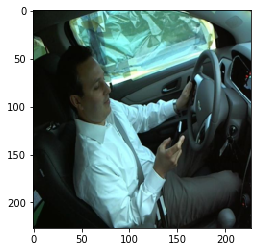

(227, 227, 3)


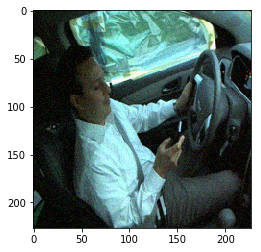

In [5]:
#example of gaussian noise
import Noise as noise
noisey_label = noise.AddNoise()
# Testing of gaussian noise
X_gaus_img = noisey_label.add_noise(newdataX)

X_gaus_img[0,:,:,:].shape
plt.imshow(newdataX[0,:,:,:])
plt.show()
X_gaus_img = np.clip(X_gaus_img[0,:,:,:], 0, 255).astype('uint8')

print(X_gaus_img.shape)
plt.imshow(X_gaus_img)

plt.show()

In [6]:
#Adding noise in label example
import Noise as noise
noisey_label = noise.AddNoise()
ymm  = noisey_label.random_output_label(np.arange(1,100),10)
print(len(np.arange(1,100)))
print(len(ymm))

<class 'int'> <class 'int'>
99
99


In [7]:
(x_train, y_train) = (X[0:15000], Y[0:15000])
(x_test, y_test) = (X[15000:], Y[15000:])
img_height, img_width, channel = x_train.shape[1],x_train.shape[2],x_train.shape[3]
print(img_height, img_width, channel)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(x_train.shape)

227 227 3
(15000, 227, 227, 3)


In [26]:
#model for sub task 

def AlexNetVarient(input_shp, conv_layer = 5, number_kernal = 96, dence_layer = 3, number_neuron =100):
    model = Sequential() 
    #initial layer fixed
    model.add(Conv2D(96, (11,11), strides=(4,4),activation='relu', padding='same', input_shape=input_shp))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(BatchNormalization())
    for i in range(conv_layer-1):
        model.add(Conv2D(number_kernal, (3,3), activation='relu', padding='same'))
        #model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
        # Local Response normalization for Original Alexnet
        model.add(BatchNormalization())
    model.add(Flatten())
    for l in range(dence_layer):
        model.add(Dense(100, activation='relu'))
        model.add(Dropout(0.2))
        
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

In [27]:
m = AlexNetVarient((img_height, img_width, channel,))

In [25]:
# AlexNet Define the Model
model_parmeters ={'number_kernel_conv_1':96,
                  'number_kernel_conv_2': 100, 
                  'number_kernel_conv_3':100,
                 'number_kernel_conv_4':100,
                 'number_kernel_conv_5':100,
                  'number_kernel_conv_6':100,
                 'number_kernel_conv_7':100,
                 'param_in_1_fully_connected':10000,
                 'param_in_2_fully_connected':10000,
                 'param_in_3_fully_connected':10000,
                 'param_in_4_fully_connected':10000,
                 'param_in_5_fully_connected':10000,
                 'dropout_1_f_layer':0.2,
                 'dropout_1_f_layer':0.4,
                 'dropout_1_f_layer':0.3,
                 'dropout_1_f_layer':0.3}
model = Sequential()
# model.add(Conv2D(10, (11,11), strides=(4,4), activation='relu', padding='valid', input_shape=(img_height, img_width, channel,)))
# for original Alexnet
model.add(Conv2D(3, (11,11), strides=(4,4), padding='same', input_shape=(img_height, img_width, channel,)))
convout1 = Activation('relu')
model.add(convout1)
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
# Local Response normalization for Original Alexnet
model.add(BatchNormalization())

#model.add(Conv2D(2, (5,5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
# Local Response normalization for Original Alexnet
model.add(BatchNormalization())

#model.add(Conv2D(3, (3,3), activation='relu', padding='same'))
#model.add(Conv2D(3, (3,3), activation='relu', padding='same'))
model.add(Conv2D(3, (3,3), activation='relu', padding='same'))
#model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
# Local Response normalization for Original Alexnet
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(4096, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [9]:
# print the model summary
model.summary()

# determine Loss function and Optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# Train the Model
#Preprocessing of images 

checkpointer = ModelCheckpoint(filepath="best_weights.hdf5",
                               monitor='val_acc',
                               verbose=1,
                               save_best_only= True)



history = model.fit(x_train, y_train,
                              batch_size = batch_size,
                              epochs=epochs,
                              callbacks=[checkpointer],
                              verbose=1,
                              validation_data=(x_test, y_test))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 57, 57, 3)         1092      
_________________________________________________________________
activation_1 (Activation)    (None, 57, 57, 3)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 3)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 3)         12        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 3)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 13, 13, 3)         12        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 3)         84        
__________

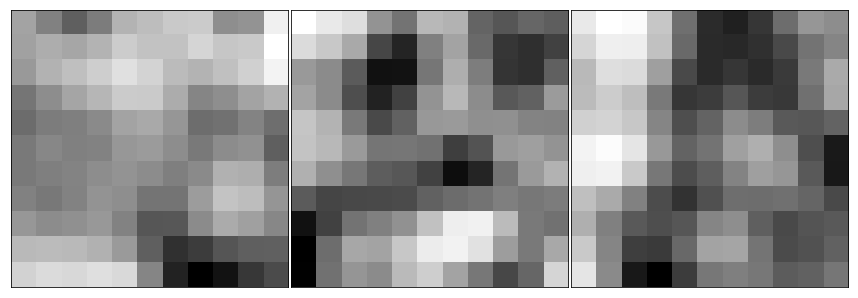

In [14]:
Example of data vizaulization 
import DataViz as dv
keranl_vix =  dv.DataVizulaize(model)
#for layer in model.layers:
#   weights = layer.get_weights() # list of numpy arrays
vizul = keranl_vix.vizualize(0,3, shapeofgrid = (1,3),gray=True)

In [488]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

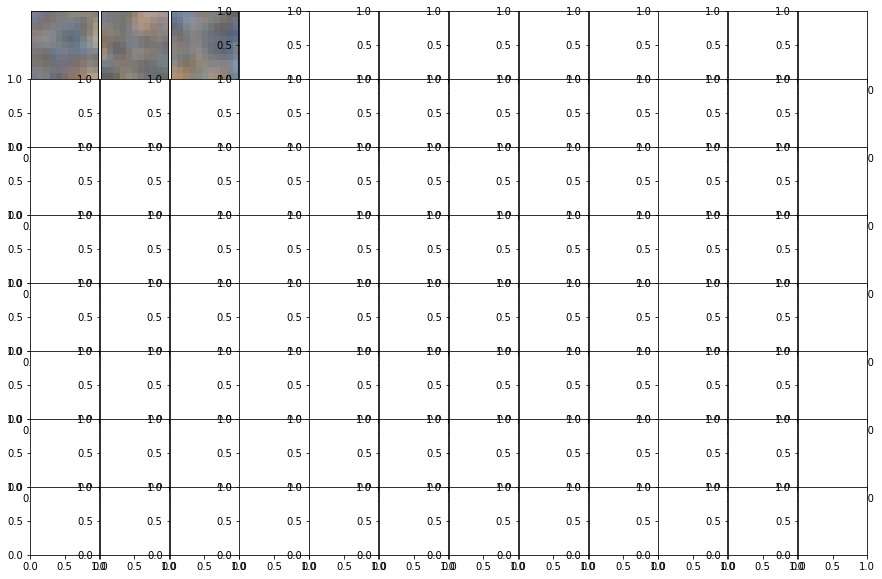

In [23]:
# kernal vizulization example
kernals = model.layers[0].get_weights()[0]
from scipy.ndimage.filters import gaussian_filter
fig, axs = plt.subplots(8,12, figsize=(15,10))
fig.subplots_adjust(hspace = .01, wspace=.01)
axs = axs.ravel()

for i in range(np.shape(kernals)[3]):
    one_kernal = np.abs(kernals[:,:,:,i])
    one_kernal -= one_kernal.mean() # Post-processes the feature to make it visually palatable
    one_kernal /= one_kernal.std()
    one_kernal *= 64
    one_kernal += 128
    one_kernal= np.clip(one_kernal, 0, 255).astype('uint8')
    #one_kernal =rgb2gray(one_kernal)
    one_kernal = gaussian_filter(one_kernal, 1)
    axs[i].imshow(one_kernal,cmap='gray')
    axs[i].axes.get_xaxis().set_ticks([])
    axs[i].axes.get_yaxis().set_ticks([])
    #axs[i].set_title(str(250+i))



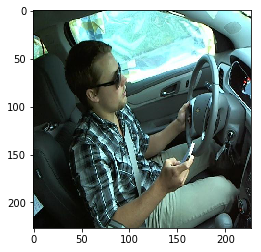

In [19]:
#Specifing an image t see the output of different layer 



img_path = '/Users/mdabdulkadir/WS1819/ADAI/data/c1/img_6.jpg'
img = image.load_img(img_path,target_size=(227,227))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor,axis=0)
img_tensor /=255.

plt.imshow(img_tensor[0])
plt.show()
#print(img_tensor)

Shape of conv: (57, 57, 10)


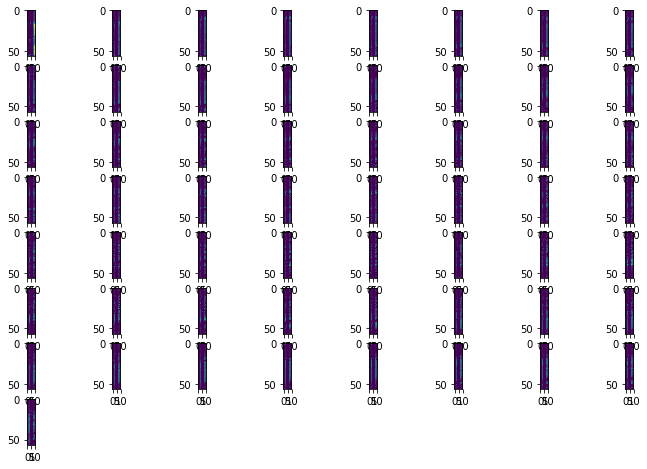

In [68]:
#predicting image
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
images = np.vstack([x])
classes = model.predict_classes(images,batch_size=1)
print("predicted claas is : ", classes)

predicted claas is :  [1]


In [156]:
layer_outputs = [layer.output for layer in model.layers[0:2]]
#extracting last 8 layer

activation_model = models.Model(inputs=model.input,outputs=layer_outputs)
#creates a model that will return these outputs, given the model input

In [157]:
activations = activation_model.predict(img_tensor)
#return a list of five Numpyarry: one array per layer activation
len(activations)

2

In [158]:
#first layer activation 
first_layer_activation = activations[0]
print(first_layer_activation.shape)


(1, 114, 114, 5)


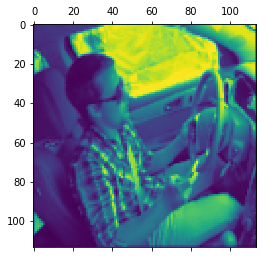

In [163]:
plt.matshow(first_layer_activation[0,:,:,4])

RuntimeError: libpng signaled error

<Figure size 1152x0 with 1 Axes>

RuntimeError: libpng signaled error

<Figure size 1152x0 with 1 Axes>

RuntimeError: libpng signaled error

<Figure size 1152x0 with 1 Axes>

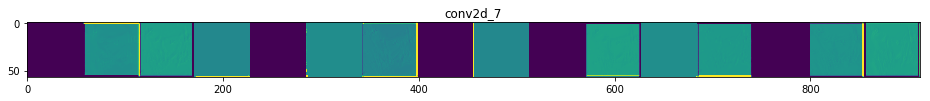

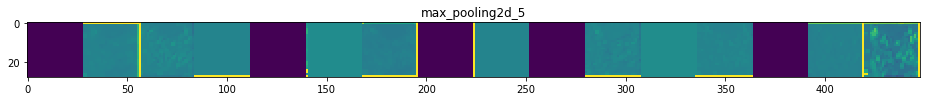

In [155]:
layer_names = []
classifier  = model
for layer in classifier.layers[0:5]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Model loaded.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 114, 114, 5)       140       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 57, 57, 5)         0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 57, 57, 5)         20        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 57, 57, 20)        2520      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 20)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 28, 20)        80        
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 3)         543    

Current loss value: 0.28353688
Current loss value: 0.37545156
Current loss value: 0.46760842
Current loss value: 0.5599222
Current loss value: 0.6521257
Current loss value: 0.74451214
Current loss value: 0.8367363
Current loss value: 0.9291191
Current loss value: 1.0213952
Current loss value: 1.1137284
Current loss value: 1.206072
Current loss value: 1.2983613
Current loss value: 1.3907156
Current loss value: 1.4830483
Current loss value: 1.5754373
Current loss value: 1.6677405
Current loss value: 1.7601126
Current loss value: 1.8525716
Current loss value: 1.9450551
Current loss value: 2.0376282
Filter 9 processed in 0s
Processing filter 10
Current loss value: 0.010713752
Current loss value: 0.022931354
Current loss value: 0.036833644
Current loss value: 0.057602257
Current loss value: 0.08342449
Current loss value: 0.108474165
Current loss value: 0.13281466
Current loss value: 0.16297619
Current loss value: 0.19391426
Current loss value: 0.21890487
Current loss value: 0.24179009
Curre

ValueError: slice index 20 of dimension 3 out of bounds. for 'strided_slice_51' (op: 'StridedSlice') with input shapes: [?,57,57,20], [4], [4], [4] and with computed input tensors: input[1] = <0 0 0 20>, input[2] = <0 0 0 21>, input[3] = <1 1 1 1>.

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


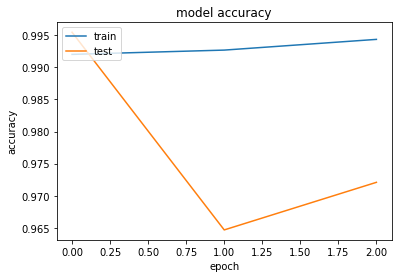

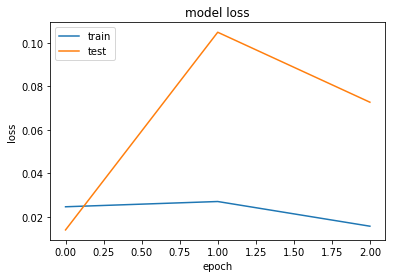

In [148]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
# Test the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.019442610729433773
Test accuracy: 0.9960136674259681
